## Imports

In [14]:
import csv
import re
import glob
import datetime
from pathlib import Path
import pandas
import matplotlib.pyplot as plt
import numpy as np
from functions import queueDirectoryPath, getFileNames, getFiles, readCSVFiles, parseDataFrame, dfAverageStd

# print(matplotlib.matplotlib_fname())

## Save Fig?

In [15]:
SAVE_FIG = False
# "OneJump" , "StutterJump" , "TimeJump"
JUMP_TYPE = "StutterJump"

## Get the data path.

In [16]:
# queue the path where the data is stored
data_path = queueDirectoryPath(Path.cwd(), header=None)
# Set the paths according to how they should be saved
save_path = Path(data_path).parents[1] / "figures"
# Make the save path if it does not exits
if not os.path.exists(save_path): os.makedirs(save_path)
# If the models path does not exist or is named wrong
if not os.path.exists(data_path):
    raise Exception("Plotting Data path does not exist or name of models file is not 'models'.")
    sys.exit()
# Print what the models path defined and the save path defined
print(f"\nThe data will be queued from:\n {data_path}\n")
print(f"The figures will be saved to:\n {save_path}")

You chose C:/Users/andre/Documents/GitHub/CRAWLAB-Student-Code---2020/Andrew Albright/Code/Pogo Stick/Learn Control/training_data/stutter_jump/Current Data/2021_11_08/trained_Heigh_StutterJump/figures_data/Combined_Data

The data will be queued from:
 C:\Users\andre\Documents\GitHub\CRAWLAB-Student-Code---2020\Andrew Albright\Code\Pogo Stick\Learn Control\training_data\stutter_jump\Current Data\2021_11_08\trained_Heigh_StutterJump\figures_data\Combined_Data

The figures will be saved to:
 C:\Users\andre\Documents\GitHub\CRAWLAB-Student-Code---2020\Andrew Albright\Code\Pogo Stick\Learn Control\training_data\stutter_jump\Current Data\2021_11_08\trained_Heigh_StutterJump\figures


## Import the Data:

In [17]:
files = getFiles("csv", data_path)
file_names = getFileNames("csv", data_path)
print(file_names)
data = readCSVFiles(files)
unique_headers = ['Time', 'Reward', 'Input', 'RodPos', 'RodVel', 'ActPos', 'ActVel']
data = parseDataFrame(data[0], unique_headers)

Number of csv files found: 1
['HeighStutterJump_Combined']


## Reward

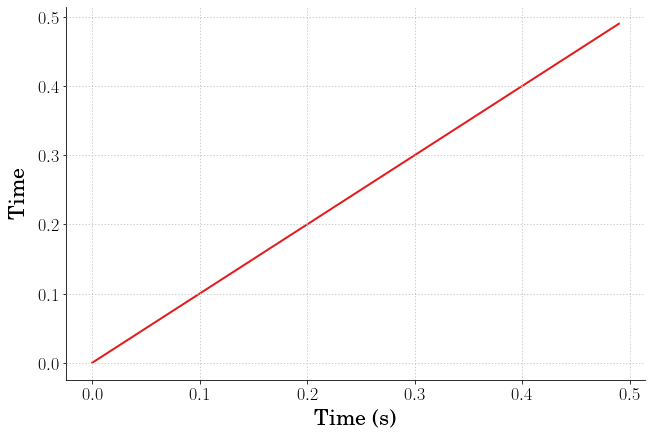

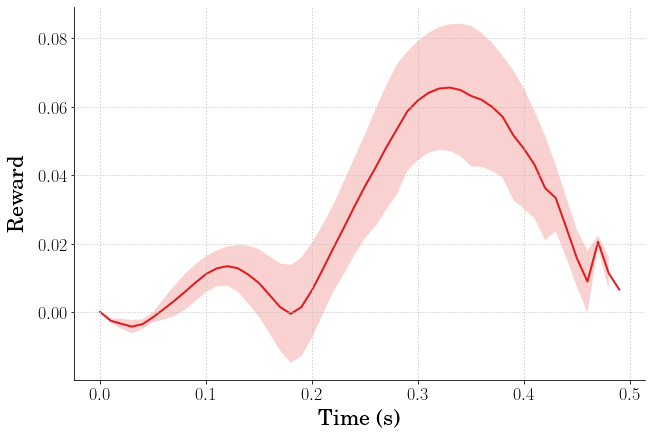

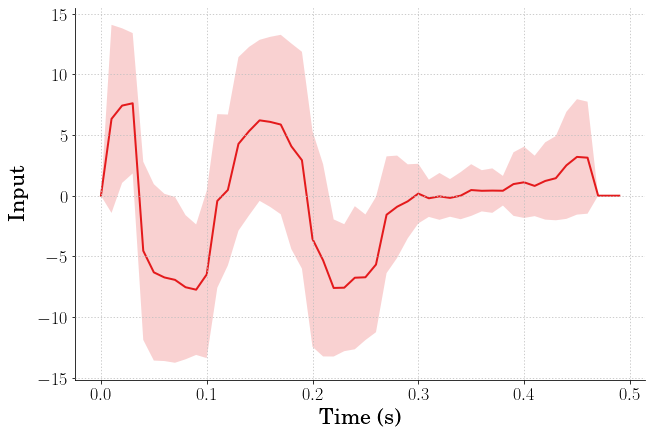

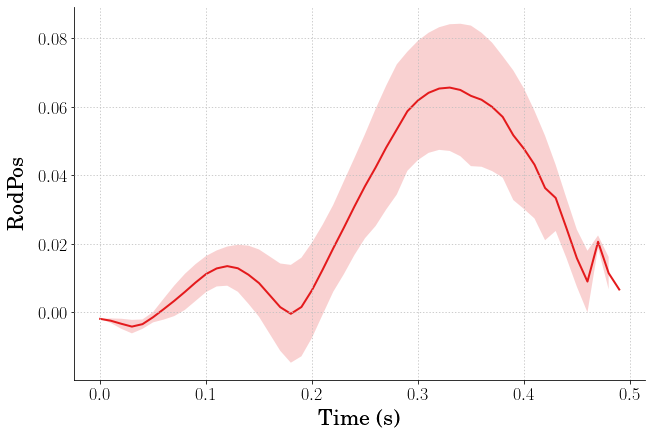

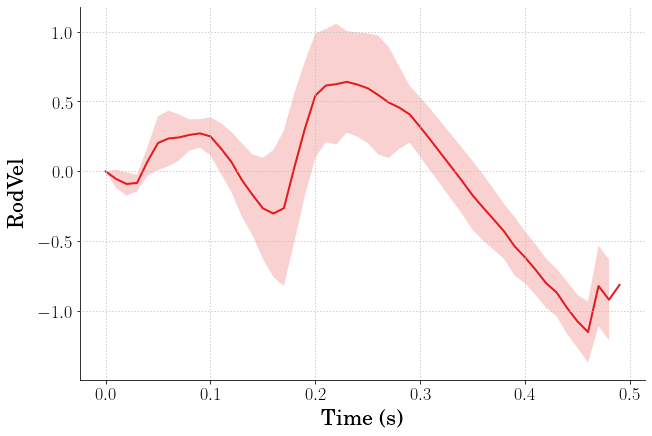

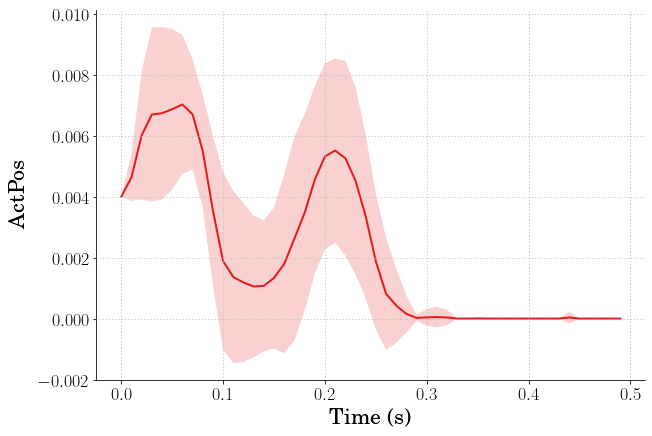

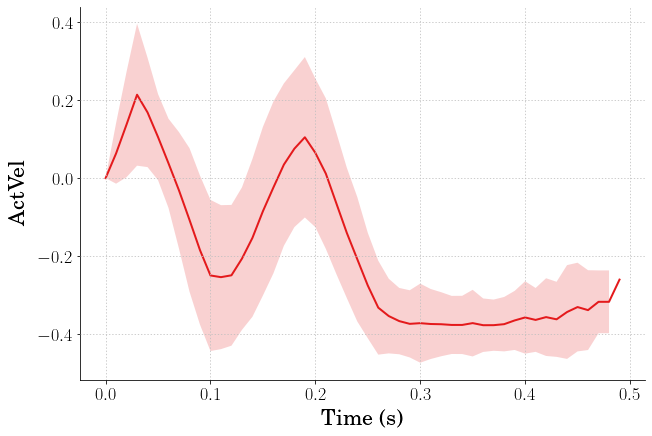

In [18]:
for header in range(len(unique_headers)):

    X_MEAN, X_STD = dfAverageStd(data[0])
    Y_MEAN, Y_STD = dfAverageStd(data[header])

    # Set the plot size - 3x2 aspect ratio is best
    fig = plt.figure(figsize=(9,6))
    ax = plt.gca()

    # Define the X and Y axis labels
    plt.xlabel(r'Time (s)', fontsize=22, weight='bold', labelpad=5)
    plt.ylabel(unique_headers[header], fontsize=22, weight='bold', labelpad=10)

    plt.plot(X_MEAN, Y_MEAN, linewidth=2, linestyle='-', label=unique_headers[header])
    plt.fill_between(X_MEAN, Y_MEAN - Y_STD, Y_MEAN + Y_STD, alpha=0.2)
            
    # uncomment below and set limits if needed
    # plt.xlim(0,1.25)
    # plt.ylim(bottom=None, top=1.75)

    # Create the legend, then fix the fontsize
    # leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
    # ltext  = leg.get_texts()
    # plt.setp(ltext, fontsize=18)

    # Adjust the page layout filling the page using the new tight_layout command
    plt.tight_layout(pad=0.5)

    # save the figure as a high-res pdf in the current folder
    filename = 'MostEfficientAgent_{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
    path = save_path / filename
    if SAVE_FIG is True:
        plt.savefig(path, transparent=True)
    plt.show()